# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнила студентка гр. 0381 Шиняева Анастасия. Вариант №23

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.

## Основные теоретические положения

**Группа** - совокупность акторов, связи между которыми должны быть изучены.

**Подгруппа** - любое подмножество акторов и все связи между ними.

**Клика** - максимальный полный подграф с 3 и более вершинами.

**n-Клика** - максимальный подграф, в котором наибольшие геодезические расстояния между узлами не больше чем n.

**n-Клан** - n-клика, в которой геодезические расстояния между узлами не превышают n для путей внутри подграфа.

**n-Клуб** - максимальный подграф диаметра не больше n.

**k-Плекс** - максимальный подграф, содержащий $g_S$ узлов, в котором каждый узел смежен с не менее чем $g_S-k$ узлами.

**k-Ядро** - максимальный подграф, в котором каждая вершина связана с не менее чем k вершинами этого подграфа.

**LS-множество** - это множество узлов $N_S$ подграфа $G_S$, такое что любое собственное подмножество $L\subset N_S$ имеет больше линий к узлам $N_S\backslash L$, чем к $N\backslash N_S$ 

**$\lambda$-множество** - множество узлов в $N_S$, такое что любая пара узлов в нём имеет большее линейное соединение, чем любая пара узлов, состоящая из одного узла из $\lambda$-множества и одного извне.

**Модулярность** - характеристика структуры сети, разница долей связей внутри группы и ожидаемой долей связей, если бы связи были размещены случайно

**Сеть аффилированности** - сеть, в которой участники аффилированы друг с другом на основе сотрудничества в рамках какой-то группы. Состоит из множества акторов $\mathcal{N}$ и множества событий $\mathcal{M}$. Может быть представлена с помощью матрицы инцидентности X размера $g\times h$ (g - число акторов, h - число событий), в которой элемент $a_{ij}$ равен 1, если актор i связан с актором j, и равен 0 иначе.

**Свойства сетей аффилированности:**

1.Количество перекрывающихся связей между событиями частично зависит от количества событий, к которым принадлежат акторы.

2.Количество связей соучастия между акторами частично зависит от размера событий.

3.Актор, принадлежащий $a_{i+}$ событиям, создает $C_{a_{i+}}^2$ парных связей между событиями.

4.Событие с участиеми $a_{+j}$ участников создает $C_{a_{+о}}^2$ связей между парами акторов.

5.Плотность для дихотомического отношения - доля присутствующих связей.

6.Плоность для ценностных отношений - среднее значение связей.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести
исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [14]:
library(statnet)
library(igraph)

### 1.  Из файла florentine_business.csv была извлечена социоматрица, сеть выведена в виде графа:

Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


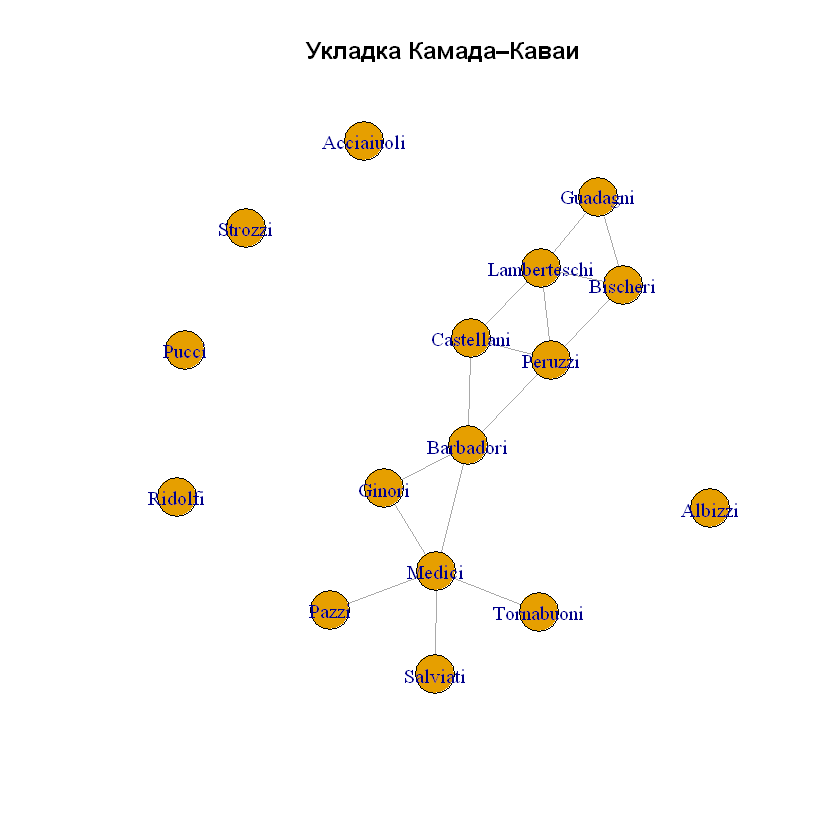

In [2]:
data<-as.matrix(read.csv("./florentine_business.csv", comment.char="#"))
data
graph<-graph_from_adjacency_matrix(data, mode = "undirected")
plot(graph, layout = layout_with_fr(graph), main = "Укладка Камада–Каваи")

### 2. Сеть была исследована на предмет подгрупп.

In [3]:
get_cliques <- function(graph,order){
  graph <- connect(graph, order=order)
  return(max_cliques(graph,min=3))
}

is_clan <-function(graph, clique, name){
  subgraph <- subgraph(graph,clique)
  order <- unlist(strsplit(name,"-"))[1]
  diameter <- diameter(subgraph,directed = FALSE)
  if(diameter > order){
    return(FALSE)
  }
  return (TRUE)
}

order <- 1
len <- 2
res <-list()
while(len > 1){
    cliques <- get_cliques(graph,order)
    cliques<-lapply(cliques, function(x) names(x))
    names(cliques) <- rep(paste(order,"клика",sep= "-"),times = length(cliques))
    res <- c(res,cliques)
    order <- order+1
    len <- length(cliques)
}
res

graph<-graph_from_adjacency_matrix(data, mode = "undirected")
cliques <- res
mask <- 1:length(cliques)
mask <-sapply(mask, function(x) is_clan(graph,cliques[[x]],names(cliques)[x]))
names(cliques)<-sapply(names(cliques), function(x) paste(unlist(strsplit(x,"-"))[1],"-клан",sep = ""))
cliques[mask]

graph <- graph.adjacency(as.matrix(data), mode="undirected")
info <- coreness(graph, mode= "all")
res <-lapply(1:max(as.integer(info)), function(x) names(info)[which(as.integer(info) >= x)])
names(res) <- sapply(1:length(res), function(x) paste(x,"ядро",sep= "-"))
res


Warning message in connect(graph, order = order):
"At core/operators/connect_neighborhood.c:77 : Order smaller than two, graph will be unchanged."


$`1-клика`
[1] "Lamberteschi" "Castellani"   "Peruzzi"     

$`1-клика`
[1] "Lamberteschi" "Bischeri"     "Guadagni"    

$`1-клика`
[1] "Lamberteschi" "Bischeri"     "Peruzzi"     

$`1-клика`
[1] "Peruzzi"    "Barbadori"  "Castellani"

$`1-клика`
[1] "Ginori"    "Barbadori" "Medici"   

$`2-клика`
[1] "Castellani"   "Peruzzi"      "Barbadori"    "Bischeri"     "Lamberteschi"

$`2-клика`
[1] "Castellani" "Peruzzi"    "Barbadori"  "Medici"     "Ginori"    

$`2-клика`
[1] "Castellani"   "Peruzzi"      "Guadagni"     "Lamberteschi" "Bischeri"    

$`2-клика`
[1] "Tornabuoni" "Barbadori"  "Salviati"   "Pazzi"      "Medici"    
[6] "Ginori"    

$`3-клика`
[1] "Guadagni"     "Barbadori"    "Peruzzi"      "Lamberteschi" "Castellani"  
[6] "Bischeri"    

$`3-клика`
[1] "Bischeri"     "Barbadori"    "Peruzzi"      "Medici"       "Lamberteschi"
[6] "Ginori"       "Castellani"  

$`3-клика`
[1] "Tornabuoni" "Barbadori"  "Salviati"   "Peruzzi"    "Pazzi"     
[6] "Medici"     "Ginori"     "Castellani"

$`4-клика`
[1] "Guadagni"     "Barbadori"    "Peruzzi"      "Medici"       "Lamberteschi"
[6] "Ginori"       "Castellani"   "Bischeri"    

$`4-клика`
 [1] "Medici"       "Barbadori"    "Tornabuoni"   "Salviati"     "Peruzzi"     
 [6] "Pazzi"        "Lamberteschi" "Ginori"       "Castellani"   "Bischeri"    

$`5-клика`
 [1] "Guadagni"     "Barbadori"    "Tornabuoni"   "Salviati"     "Peruzzi"     
 [6] "Pazzi"        "Medici"       "Lamberteschi" "Ginori"       "Castellani"  
[11] "Bischeri"

$`1-клан`
[1] "Lamberteschi" "Castellani"   "Peruzzi"     

$`1-клан`
[1] "Lamberteschi" "Bischeri"     "Guadagni"    

$`1-клан`
[1] "Lamberteschi" "Bischeri"     "Peruzzi"     

$`1-клан`
[1] "Peruzzi"    "Barbadori"  "Castellani"

$`1-клан`
[1] "Ginori"    "Barbadori" "Medici"   

$`2-клан`
[1] "Castellani"   "Peruzzi"      "Barbadori"    "Bischeri"     "Lamberteschi"

$`2-клан`
[1] "Castellani" "Peruzzi"    "Barbadori"  "Medici"     "Ginori"    

$`2-клан`
[1] "Castellani"   "Peruzzi"      "Guadagni"     "Lamberteschi" "Bischeri"    

$`2-клан`
[1] "Tornabuoni" "Barbadori"  "Salviati"   "Pazzi"      "Medici"    
[6] "Ginori"    

$`3-клан`
[1] "Guadagni"     "Barbadori"    "Peruzzi"      "Lamberteschi" "Castellani"  
[6] "Bischeri"    

$`3-клан`
[1] "Bischeri"     "Barbadori"    "Peruzzi"      "Medici"       "Lamberteschi"
[6] "Ginori"       "Castellani"  

$`3-клан`
[1] "Tornabuoni" "Barbadori"  "Salviati"   "Peruzzi"    "Pazzi"     
[6] "Medici"     "Ginori"     "Castellani"

$`4-клан`
[1] "Guadagni"     "Barbadori"    "Peruzzi"      "Medici"       "Lamberteschi"
[6] "Ginori"       "Castellani"   "Bischeri"    

$`4-клан`
 [1] "Medici"       "Barbadori"    "Tornabuoni"   "Salviati"     "Peruzzi"     
 [6] "Pazzi"        "Lamberteschi" "Ginori"       "Castellani"   "Bischeri"    

$`5-клан`
 [1] "Guadagni"     "Barbadori"    "Tornabuoni"   "Salviati"     "Peruzzi"     
 [6] "Pazzi"        "Medici"       "Lamberteschi" "Ginori"       "Castellani"  
[11] "Bischeri"

$`1-ядро`
 [1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
 [6] "Lamberteschi" "Medici"       "Pazzi"        "Peruzzi"      "Salviati"    
[11] "Tornabuoni"  

$`2-ядро`
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
[6] "Lamberteschi" "Medici"       "Peruzzi"

Вывод: Сеть имеет довольно большое количество 2 и 3 клик и относительно большое количество узлов в них, значит среди неизолированных семей достаточно тесные связи

### 3. Вариант 23. 23 mod 3 = 2. 2 вариант - Spinglass, Walktrap, Label propagation. Были исследованы алгоритмы обнаружения сообществ:
<br>Spinglass - алгоритм, основанный на статистической механической модели спинового стекла с имитацией отжига.
<br>Walktrap - алгоритм, основанный на случайном блуждании в графе (идея состоит в том, что короткие случайные блуждания, как правило, остаются в одном и том же сообществе).
<br>Label propagation - каждый узел инициализируется уникальной меткой, и на каждом шаге каждый узел принимает метку, которую в настоящее время имеет большинство его соседей.

Class 'communities'  hidden list of 6
 $ merges    : num [1:10, 1:2] 4 5 7 9 14 10 3 18 22 24 ...
 $ modularity: num [1:11] -0.1133 -0.0733 -0.0333 0.0689 0.1244 ...
 $ membership: num [1:16] 3 4 1 2 2 1 2 2 1 1 ...
 $ names     : chr [1:16] "Acciaiuoli" "Albizzi" "Barbadori" "Bischeri" ...
 $ vcount    : int 16
 $ algorithm : chr "walktrap"


$`1`
[1] "Barbadori"  "Ginori"     "Medici"     "Pazzi"      "Salviati"  
[6] "Tornabuoni"

$`2`
[1] "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi" "Peruzzi"     

$`3`
[1] "Acciaiuoli"

$`4`
[1] "Albizzi"

$`5`
[1] "Pucci"

$`6`
[1] "Ridolfi"

$`7`
[1] "Strozzi"

Class 'communities'  hidden list of 5
 $ membership: num [1:16] 1 2 3 4 3 3 4 4 3 3 ...
 $ modularity: num 0.22
 $ names     : chr [1:16] "Acciaiuoli" "Albizzi" "Barbadori" "Bischeri" ...
 $ vcount    : int 16
 $ algorithm : chr "label propagation"


$`1`
[1] "Acciaiuoli"

$`2`
[1] "Albizzi"

$`3`
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "Pazzi"     
[6] "Peruzzi"    "Salviati"   "Tornabuoni"

$`4`
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`5`
[1] "Pucci"

$`6`
[1] "Ridolfi"

$`7`
[1] "Strozzi"

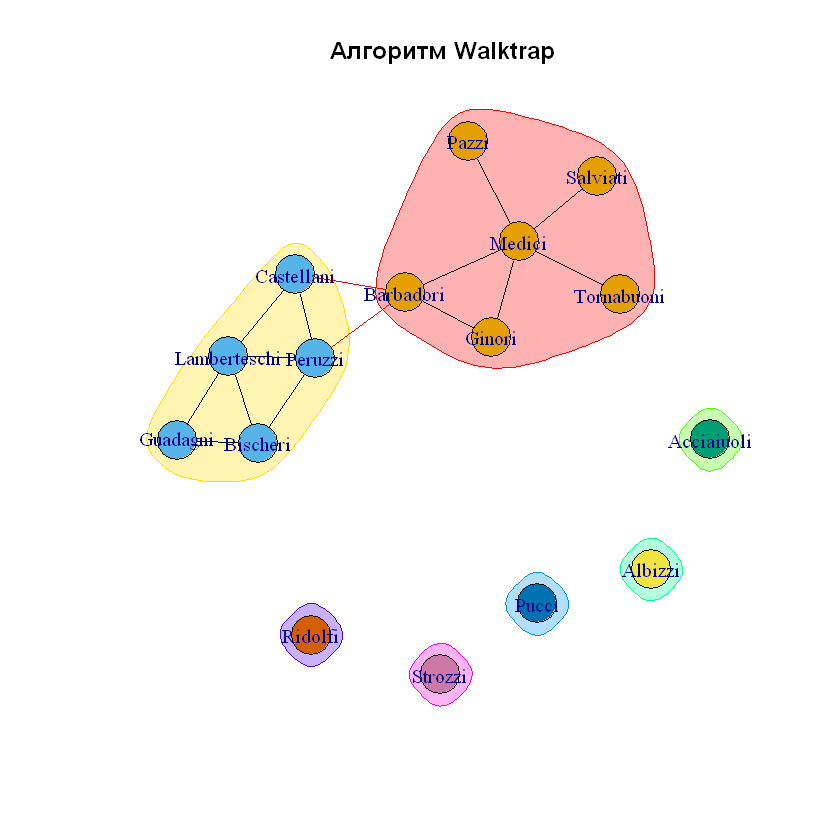

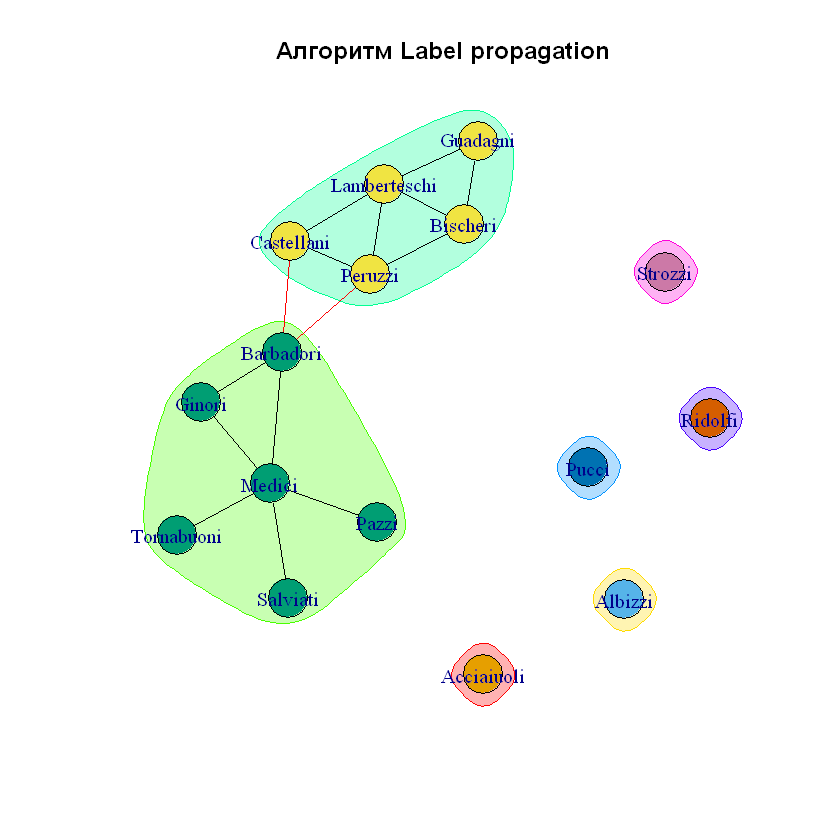

In [4]:
graph<-graph_from_adjacency_matrix(data, mode = "undirected")

x1<-cluster_walktrap(graph)
str(x1)
x1[ 1:length(x1) ]
x2<-cluster_label_prop(graph)
str(x2) 
x2[ 1:length(x2) ]
plot(cluster_walktrap(graph), graph, layout = layout_with_fr(graph), main = "Алгоритм Walktrap")
plot(cluster_label_prop(graph), graph, layout = layout_with_fr(graph), main = "Алгоритм Label propagation")

Вывод: Алгоритм Spinglass неприменим для несвязных графов. Алгоритмы Walktrap и Label propagation определяют изолированные вершины каждую в отдельное сообщество, а остальные вершины делят на группы, имеющие много связей внутри и меньшее число связей снаружи и судя по результатам работы этих алгоритмов, Label propagation чаще всего делит связные подгруппы исходной сети на те же сообщества, что и Walktrap, но при некоторых запусках это может быть не так (судя по запускам алгоритмов Walktrap детерминированный, а Label propagation - нет).

### 4. Из файла ceo.csv была извлечена матрица инцидентности и отображена на экране. 

In [5]:
data2<-as.matrix(read.csv("./ceo.csv", comment.char="#", header = FALSE))
data2

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


### 5. Cеть была отображена в виде биграфа

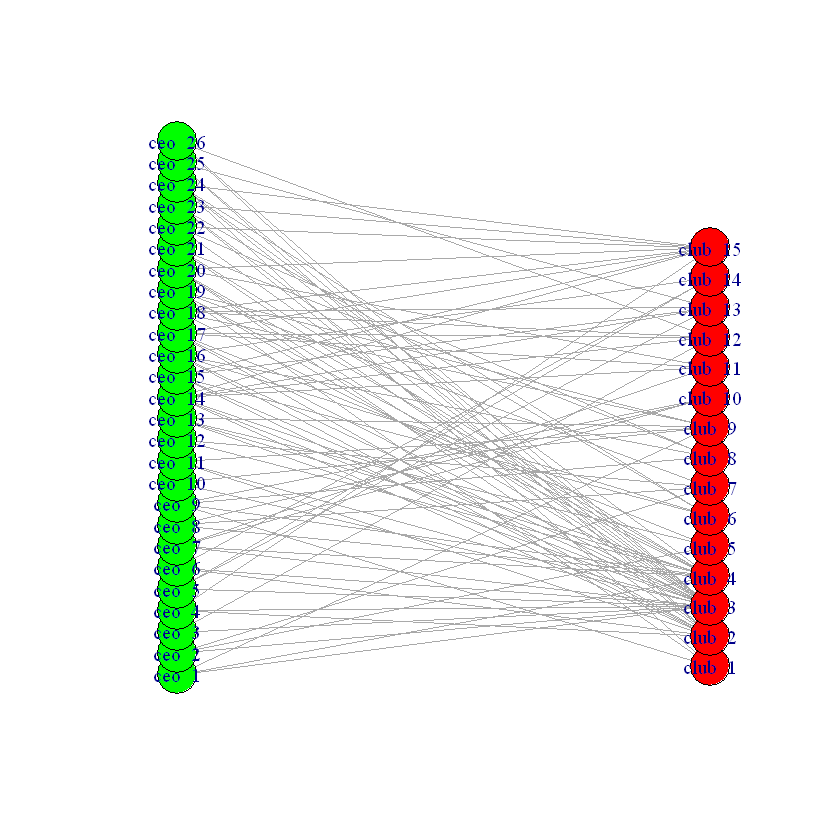

In [6]:
g<-26 # число директоров
h<-15 # число клубов
zero_matr<-matrix(0,nrow=g,ncol=g)
res<-cbind(zero_matr, data2)
zero_matr<-matrix(0, nrow=h,ncol=h)
tmp<-cbind(t(data2), zero_matr)
res<-rbind(res, tmp)

clubs_names<-paste(rep('club ',h),1:h)
ceo_names<-paste(rep('ceo ',g),1:g)
colnames(res)<-c(ceo_names, clubs_names)
rownames(res)<-c(ceo_names, clubs_names)

bipartite_graph<-graph_from_adjacency_matrix(res, mode = "undirected")
V(bipartite_graph)$x<-c(rep(0, g), rep(0.01,h))
V(bipartite_graph)$y<-c(1:g, (1:h)*1.4)
V(bipartite_graph)$color<-c(rep('green', g), rep('red',h))

plot(bipartite_graph)

### 7. Cеть аффилированности была представлена в виде двух одномодальных
сетей: сети соучастия и сети перекрытия событий. Полученные сети были отображены в виде ценностных матриц и взвешенных графов.

[1] "Матрица соучастия акторов:"


3,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
1,3,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
1,1,2,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,1,3,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,1,3,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,1,2,2,3,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
2,1,1,1,1,1,4,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
1,1,0,0,0,0,2,3,2,0,⋯,0,1,2,1,1,0,0,1,0,0
1,0,0,0,0,0,2,2,4,0,⋯,0,1,2,1,2,1,0,2,0,0
2,1,1,1,1,1,1,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1
2,1,1,2,1,2,1,0,0,2,⋯,2,1,2,2,1,1,2,1,2,2


[1] "Матрица перекрытия событий:"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,3,0,2,3,0,1,1,1,1,1,0,0,0,0,1
V2,0,11,11,2,1,3,0,1,1,0,3,3,3,2,6
V3,2,11,22,8,3,4,2,3,5,1,4,4,4,3,8
V4,3,2,8,12,1,1,3,2,4,3,3,2,2,0,4
V5,0,1,3,1,3,0,1,0,1,0,1,1,0,0,1
V6,1,3,4,1,0,4,0,1,0,0,0,0,1,1,3
V7,1,0,2,3,1,0,4,0,1,1,0,0,0,0,0
V8,1,1,3,2,0,1,0,4,0,1,0,0,0,1,1
V9,1,1,5,4,1,0,1,0,6,0,0,1,1,0,1
V10,1,0,1,3,0,0,1,1,0,3,1,0,0,0,0


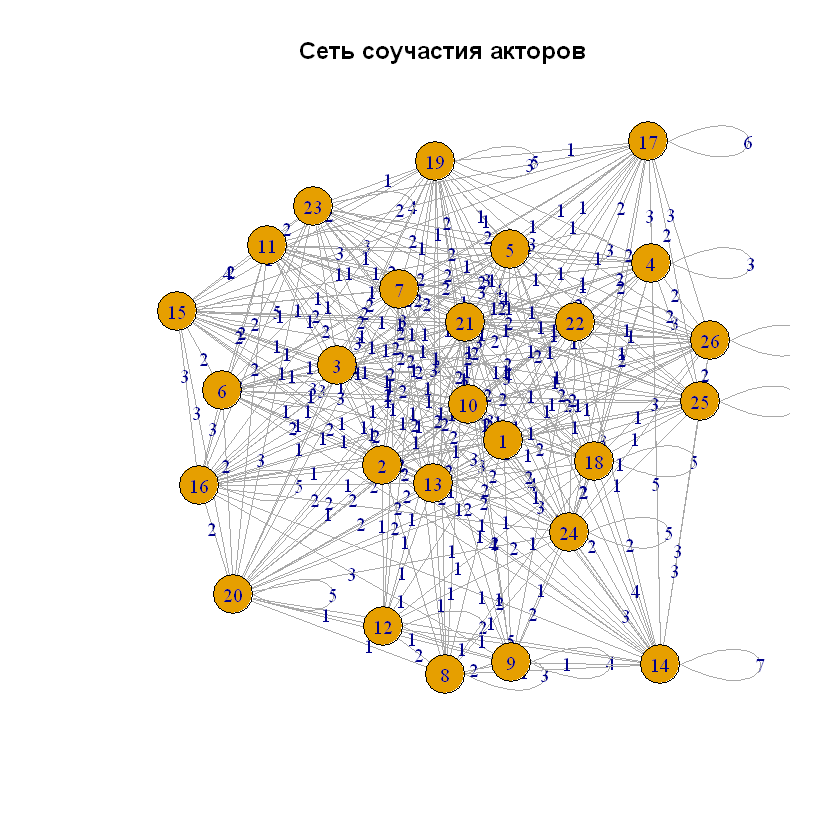

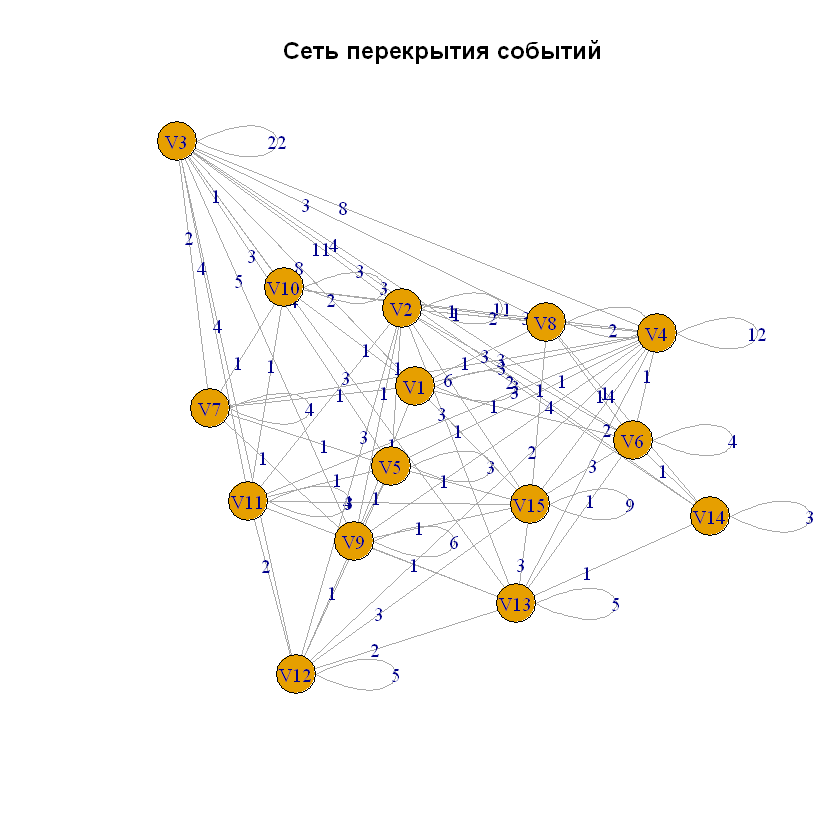

In [7]:
X <- data2
X_N <- X %*% t(X)
print("Матрица соучастия акторов:")
X_N
graph<-graph_from_adjacency_matrix(X_N, mode = "undirected", weighted = TRUE)
plot(graph, edge.label=E(graph)$weight, layout=layout_with_kk(graph), main='Сеть соучастия акторов')

X_M <- t(X) %*% X
print("Матрица перекрытия событий:")
X_M
graph <- graph_from_adjacency_matrix(X_M, mode="undirected", weighted=TRUE)
plot(graph, edge.label=E(graph)$weight, layout=layout_with_kk(graph), main='Сеть перекрытия событий')

Вывод: Каждый директор состоит в одном клубе с большинством других директоров, второй и третий клуб содержат наибольшее число общих участников среди всех пар клубов. 

### 8.  Были вычислены степень участия для каждого актора и среднее
количество событий, с которыми актор аффилирован.

In [8]:
print(matrix(diag(X_N), nrow = 1, dimnames = list("Степени узлов:", paste('N', 1:g, sep=''))))
cat("Cреднее количество событий, с которыми актор аффилирован: ", sum(diag(X_N))/g , '\n')

               N1 N2 N3 N4 N5 N6 N7 N8 N9 N10 N11 N12 N13 N14 N15 N16 N17 N18
Степени узлов:  3  3  2  3  3  3  4  3  4   2   3   2   4   7   5   5   6   5
               N19 N20 N21 N22 N23 N24 N25 N26
Степени узлов:   5   5   3   3   4   5   3   3
Cреднее количество событий, с которыми актор аффилирован:  3.769231 


Вывод: Директор, состоящий в наибольшем количестве клубов - директор под номером 14. В среднем каждый директор состоит в 3-4 клубах.

### 9.  Были вычислены размер и средний размер для каждого события.

In [9]:
matrix(diag(X_M), nrow = 1, dimnames = list("Размер события:", paste('M', 1:h, sep='')))
cat("Cредний размер: ", sum(diag(X_M))/h , '\n')

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15
Размер события:,3,11,22,12,3,4,4,4,6,3,4,5,5,3,9


Cредний размер:  6.533333 


Вывод: Самый посещаемый клуб - третий. В среднем каждый клуб имеет 6-7 участников.

### 10. Были вычислены плотность для соотношения соучастия и отношения перекрытия.

In [10]:
D_N<-(1/(g*(g-1))*(sum(X_N)-sum(diag(X_N))))
cat("Плотность для отношения соучастия: ", D_N , '\n')
D_M<-(1/(h*(h-1))*(sum(X_M)-sum(diag(X_M))))
cat("Плотность для отношения перекрытия: ", D_M , '\n')

Плотность для отношения соучастия:  1.412308 
Плотность для отношения перекрытия:  1.485714 


Вывод: В среднем в каждой паре различных директоров оба состоят в 1-2 общих клубах, в среднем в каждой паре различных клубов оба клуба имеют 1-2 общих директора.

### 11.  Был определён диаметр сети аффилированности.

In [11]:
graph1<-graph_from_adjacency_matrix(X_N, mode = "undirected")
graph2<-graph_from_adjacency_matrix(X_M, mode = "undirected")
cat("Диаметр сети аффилированности: ", max(diameter(graph1), diameter(graph2)) , '\n')

Диаметр сети аффилированности:  2 


### 12.  Были определены клики уровня 𝑐 = {4, 3} для отношения соучастия и
клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий.

In [12]:
graphN<-graph_from_adjacency_matrix(X_N, mode = "undirected", weighted = TRUE)
graphM<-graph_from_adjacency_matrix(X_M, mode = "undirected", weighted = TRUE)
cat("Клики уровня 3 в отношении соучастия:\n")
graphWithoutLightEdges <- delete.edges(graphN, E(graphN)[E(graphN)$weight < 3])
max_cliques(graphWithoutLightEdges, min=3) 
cat("Клики уровня 4 в отношении соучастия:\n")
graphWithoutLightEdges <- delete.edges(graphN, E(graphN)[E(graphN)$weight < 4])
max_cliques(graphWithoutLightEdges, min=3) 
cat("Клики уровня 2 в отношении перекрытия событий:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 2])
max_cliques(graphWithoutLightEdges, min=3) 
cat("Клики уровня 3 в отношении перекрытия событий:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 3])
max_cliques(graphWithoutLightEdges, min=3)
cat("Клики уровня 4 в отношении перекрытия событий:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 4])
max_cliques(graphWithoutLightEdges, min=3)
cat("Клики уровня 5 в отношении перекрытия событий:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 5])
max_cliques(graphWithoutLightEdges, min=3)
cat("Клики уровня 6 в отношении перекрытия событий:\n")
graphWithoutLightEdges <- delete.edges(graphM, E(graphM)[E(graphM)$weight < 6])
max_cliques(graphWithoutLightEdges, min=3)

Клики уровня 3 в отношении соучастия:


[[1]]
+ 3/26 vertices, from ce16aae:
[1]  1 13 19

[[2]]
+ 3/26 vertices, from ce16aae:
[1]  7 14 20

[[3]]
+ 3/26 vertices, from ce16aae:
[1] 16 15 23

[[4]]
+ 3/26 vertices, from ce16aae:
[1] 25 14 15

[[5]]
+ 3/26 vertices, from ce16aae:
[1] 26 14 17

[[6]]
+ 5/26 vertices, from ce16aae:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, from ce16aae:
[1] 14  4 23 20 17 15


Клики уровня 4 в отношении соучастия:


[[1]]
+ 3/26 vertices, from ce19df9:
[1] 20 14 17


Клики уровня 2 в отношении перекрытия событий:


[[1]]
+ 3/15 vertices, named, from ce1c353:
[1] V1 V3 V4

[[2]]
+ 3/15 vertices, named, from ce1c353:
[1] V7 V3 V4

[[3]]
+ 3/15 vertices, named, from ce1c353:
[1] V8 V3 V4

[[4]]
+ 3/15 vertices, named, from ce1c353:
[1] V9 V3 V4

[[5]]
+ 3/15 vertices, named, from ce1c353:
[1] V14 V2  V3 

[[6]]
+ 4/15 vertices, named, from ce1c353:
[1] V6  V2  V15 V3 

[[7]]
+ 6/15 vertices, named, from ce1c353:
[1] V15 V2  V12 V4  V3  V11

[[8]]
+ 6/15 vertices, named, from ce1c353:
[1] V15 V2  V12 V4  V3  V13


Клики уровня 3 в отношении перекрытия событий:


[[1]]
+ 3/15 vertices, named, from ce1f542:
[1] V9 V3 V4

[[2]]
+ 4/15 vertices, named, from ce1f542:
[1] V13 V2  V15 V3 

[[3]]
+ 4/15 vertices, named, from ce1f542:
[1] V15 V3  V2  V6 

[[4]]
+ 4/15 vertices, named, from ce1f542:
[1] V15 V3  V2  V11

[[5]]
+ 4/15 vertices, named, from ce1f542:
[1] V15 V3  V2  V12

[[6]]
+ 4/15 vertices, named, from ce1f542:
[1] V15 V3  V4  V11


Клики уровня 4 в отношении перекрытия событий:


[[1]]
+ 3/15 vertices, named, from ce2313c:
[1] V15 V3  V2 

[[2]]
+ 3/15 vertices, named, from ce2313c:
[1] V15 V3  V4 

[[3]]
+ 3/15 vertices, named, from ce2313c:
[1] V4 V3 V9


Клики уровня 5 в отношении перекрытия событий:


[[1]]
+ 3/15 vertices, named, from ce25d22:
[1] V2  V3  V15


Клики уровня 6 в отношении перекрытия событий:


[[1]]
+ 3/15 vertices, named, from ce2a521:
[1] V2  V3  V15


Вывод: В сети есть 7 сообществ, в каждом из которых каждая пара директоров состоит не менее чем в 3 общих клубах, наибольшее из этих сообществ состоит из 6 директоров под номерами 14, 4, 23, 20, 17, 15, и есть всего одно сообщество, такое, что все пары директоров состоят не менее чем в 4 общих клубах. В сети существует по одной подгруппе клубов, таких что каждая пара клубов имеет соответственно минимум 5 и 6 общих участников и существует 8, 6, 3 подгрупп клубов, в каждой из которых каждая пара клубов имеет соответственно минимум 2, 3, 4 общих участников.   

### 13. Для каждой пары событий было определено отношение шансов.  $\Theta_{kl}$

In [13]:
for (k in 1:(h-1)){
    for(l in (k+1):h){
        tmp <- data2[, c(k, l)]
        res <- sum(colSums(t(tmp) == c(1, 1)) == ncol(tmp))*
        sum(colSums(t(tmp) == c(0, 0)) == ncol(tmp))/
        sum(colSums(t(tmp) == c(0, 1)) == ncol(tmp))/
        sum(colSums(t(tmp) == c(1, 0)) == ncol(tmp))
        cat('(', k, ', ', l, ') = ', res, '\n', sep="")
    }
}

(1, 2) = 0
(1, 3) = 0.3
(1, 4) = Inf
(1, 5) = 0
(1, 6) = 3.333333
(1, 7) = 3.333333
(1, 8) = 3.333333
(1, 9) = 1.8
(1, 10) = 5.25
(1, 11) = 0
(1, 12) = 0
(1, 13) = 0
(1, 14) = 0
(1, 15) = 0.9375
(2, 3) = Inf
(2, 4) = 0.1111111
(2, 5) = 0.65
(2, 6) = 5.25
(2, 7) = 0
(2, 8) = 0.4
(2, 9) = 0.2
(2, 10) = 0
(2, 11) = 5.25
(2, 12) = 2.4375
(2, 13) = 2.4375
(2, 14) = 3.111111
(2, 15) = 4.8
(3, 4) = 0
(3, 5) = Inf
(3, 6) = Inf
(3, 7) = 0.1
(3, 8) = 0.4736842
(3, 9) = 0.8823529
(3, 10) = 0.04761905
(3, 11) = Inf
(3, 12) = 0.6666667
(3, 13) = 0.6666667
(3, 14) = Inf
(3, 15) = 1.714286
(4, 5) = 0.5454545
(4, 6) = 0.3333333
(4, 7) = 4.333333
(4, 8) = 1.2
(4, 9) = 3
(4, 10) = Inf
(4, 11) = 4.333333
(4, 12) = 0.7333333
(4, 13) = 0.7333333
(4, 14) = 0
(4, 15) = 0.9
(5, 6) = 0
(5, 7) = 3.333333
(5, 8) = 0
(5, 9) = 1.8
(5, 10) = 0
(5, 11) = 3.333333
(5, 12) = 2.375
(5, 13) = 0
(5, 14) = 0
(5, 15) = 0.9375
(6, 7) = 0
(6, 8) = 2.111111
(6, 9) = 0
(6, 10) = 0
(6, 11) = 0
(6, 12) = 0
(6, 13) = 1.5
(6, 14) 

Вывод: Среди полученных значений есть нули, что говорит о наличии пар клубов, в которых нет общих участников. Значения, равные бесконечности (нулевой знаменатель), говорят о том, что если какой-то директор является участником одного клуба из пары, то он точно является участником второго клуба из пары.

## Выводы

В ходе выполнения данной лабораторной работы были получены навыки работы с математическими пакетами для исследования подгрупп в социальных сетях, а также навыки моделирования, отображения и анализа сетей аффилированности. На примере конкретной сети были изучены n-клики, n-кланы, k-плексы, k-ядра, n-клубы и сети аффелированости, которые были разбиты на одномодальные сети, позволяющие полнее ее изучить.